# Modelling disease kinetics 

From [Wikipedia](https://en.wikipedia.org/wiki/Mathematical_modelling_of_infectious_disease) I found the SIR model, which is given by the following coupled ODE's:

$$\frac{dS}{dt} = -\frac{\beta S I}{N}$$

$$\frac{dI}{dt} = \frac{\beta S I}{N}-\gamma I$$

$$\frac{dR}{dt} = \gamma I$$

By using this model I am assuming that the disease is contained to small communities (relative to the population of the country), and that within those communities, the disease spreads evenly and randomly.

The total number of people exposed is $N$, the total number of susceptible people is $S(t)$, the number of infected people is $I(t)$, and the number of people who have recovered/died is given by $R(t)$.

$\beta$ is the infection rate, and $\gamma$ is the combined rate of recovery and death.

### Import libraries

In [16]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
%matplotlib inline

### Read CSV files

In [17]:
cases = pd.read_csv('cases.csv')
deaths = pd.read_csv('deaths.csv')
factors = pd.read_csv('factors.csv')
factors.index = factors['Unnamed: 0']
factors = factors.drop('Unnamed: 0', axis=1)
del factors.index.name

### Demonstration of Fitting

In [18]:
def SIR(y,t,b,n,g):
    s,i,r = y
    dydt = [-b*s*i/n, b*s*i/n-g*i, g*i]
    return dydt

In [25]:
China_cases = cases['China'].to_numpy()
China_cases = [x for x in China_cases if x > 100]
t = np.linspace(0, len(China_cases)-1, len(China_cases))

In [26]:
b = 0.45
n = 83000
g = 0.15
y0 = [n-100, 100 ,0]
sol = odeint(SIR, y0, t, args=(b,n,g))

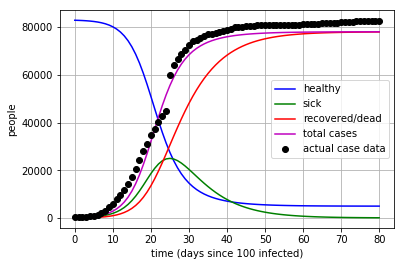

In [27]:
plt.plot(t, sol[:, 0], 'b', label='healthy')
plt.plot(t, sol[:, 1], 'g', label='sick')
plt.plot(t, sol[:, 2], 'r', label='recovered/dead')
plt.plot(t, sol[:,1]+sol[:,2], 'm', label='total cases')
plt.plot(t, China_cases, 'ko', label='actual case data')
plt.legend(loc='best')
plt.title('')
plt.xlabel('time (days since 100 infected)')
plt.ylabel('# of people')
plt.grid()
plt.show()

In [14]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.odr import Model, Data, ODR
# Experimental data 
P = China_cases

# Times at which the solution is to be computed.
t = np.linspace(0, len(China_cases)-1, len(China_cases))


def coupledODE(beta, x):
    #k, k3, k4 = beta
    b,n,g = beta

    # Three coupled ODEs
    def conc (y, t) : 
        dsdt = -b*y[0]*y[1]/n
        didt = b*y[0]*y[1]/n - g*y[1]
        drdt = g*y[1]
        f = np.array([dsdt, didt, drdt])
        return f


    # Initial conditions for y[0], y[1] and y[2]
    y0 = np.array([n-100, 100, 0.0])

    # Solve the equation
    y = odeint(conc, y0, x)

    return y[:,1]+y[:,2]
    # in case you are only fitting to experimental findings of ODE #1

    # return y.ravel()
    # in case you have experimental findings of all three ODEs

data = Data(t, P)
# with P being experimental findings of ODE #1

# data = Data(np.repeat(t, 3), P.ravel())
# with P being a (3,N) array of experimental findings of all ODEs

model = Model(coupledODE)
guess = [0.45,83000,0.15]
odr = ODR(data, model, guess)
odr.set_job(2)
out = odr.run()
print(out.beta)
print(out.sd_beta)

f = plt.figure()
p = f.add_subplot(111)
p.plot(t, P, 'ro')
p.plot(t, coupledODE(out.beta, t))
plt.show()

NameError: name 'China_cases' is not defined

In [197]:
def SIR(y,t,b,n,g):
    s,i,r = y
    dydt = [-b*s*i/n, b*s*i/n-g*i, g*i]
    return dydt

In [206]:
b = 0.717
n = 123803
g = 0.441
y0 = [n-100, 100 ,0]
t = np.linspace(0, 99, 100)
sol = odeint(SIR, y0, t, args=(b,n,g))

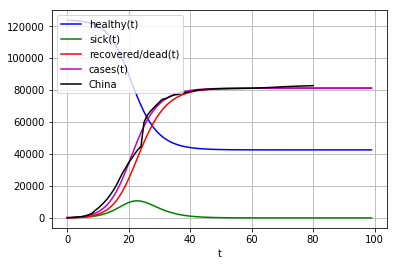

In [207]:
plt.plot(t, sol[:, 0], 'b', label='healthy(t)')
plt.plot(t, sol[:, 1], 'g', label='sick(t)')
plt.plot(t, sol[:, 2], 'r', label='recovered/dead(t)')
plt.plot(t, sol[:,1]+sol[:,2], 'm', label='cases(t)')
China_cases = cases['China'].to_numpy()
China_cases = [x for x in China_cases if x > 100]
t = np.linspace(0, len(China_cases)-1, len(China_cases))
plt.plot(t, China_cases, 'k', label='China')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [29]:
bs = []
ns = []
gs = []
for col in cases.columns:
    x_cases = cases[col].to_numpy()
    x_cases = [x for x in x_cases if x > 100]
    
    
    P = x_cases

    # Times at which the solution is to be computed.
    t = np.linspace(0, len(x_cases)-1, len(x_cases))


    def coupledODE(beta, x):
        #k, k3, k4 = beta
        b,n,g = beta

        # Three coupled ODEs
        def conc (y, t) : 
            dsdt = -b*y[0]*y[1]/n
            didt = b*y[0]*y[1]/n - g*y[1]
            drdt = g*y[1]
            f = np.array([dsdt, didt, drdt])
            return f


        # Initial conditions for y[0], y[1] and y[2]
        y0 = np.array([n-100, 100, 0.0])

        # Solve the equation
        y = odeint(conc, y0, x)

        return y[:,1]+y[:,2]
        # in case you are only fitting to experimental findings of ODE #1

        # return y.ravel()
        # in case you have experimental findings of all three ODEs

    data = Data(t, P)
    # with P being experimental findings of ODE #1

    # data = Data(np.repeat(t, 3), P.ravel())
    # with P being a (3,N) array of experimental findings of all ODEs

    model = Model(coupledODE)
    guess = [0.45,x_cases[-1],0.15]
    odr = ODR(data, model, guess)
    odr.set_job(2)
    out = odr.run()
    bs.append(out.beta[0])
    ns.append(out.beta[1])
    gs.append(out.beta[2])
    
    #print(out.beta)
    #print(out.sd_beta)

#     f = plt.figure()
#     p = f.add_subplot(111)
#     p.plot(t, P, 'ro')
#     p.plot(t, coupledODE(out.beta, t))
#     plt.show()

    

In [30]:
fit_b = pd.DataFrame(bs).transpose()
fit_b.columns = cases.columns
fit_b.index = ['b']
fit_n = pd.DataFrame(ns).transpose()
fit_n.columns = cases.columns
fit_n.index = ['n']
fit_g = pd.DataFrame(gs).transpose()
fit_g.columns = cases.columns
fit_g.index = ['g']

frames = [fit_b, fit_g, fit_n]
fit_data = pd.concat(frames)

In [31]:
fit_data

,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Colombia,Croatia,Czech Republic,Denmark,Estonia,Finland,France,Germany,Greece,Hungary,India,Indonesia,Iran,Ireland,Italy,Japan,Latvia,Lithuania,Luxembourg,Malaysia,Malta,Mexico,Morocco,Netherlands,New Zealand,Norway,Pakistan,Peru,Philippines,Poland,Portugal,Romania,Russia,Serbia,Singapore,Slovakia,Slovenia,South Korea,Spain,Sweden,Switzerland,Taiwan,Thailand,Turkey,United Kingdom,United States,Uruguay,Vietnam
b,0.390725,0.241984,0.390226,0.273490,0.829931,0.241757,0.346410,0.551794,0.692107,0.299799,0.416333,0.444622,0.621096,0.246686,0.396823,0.811893,0.705154,0.301074,0.293272,0.191502,0.415667,2.836548e+00,0.428603,1.582510,0.185463,0.214761,0.352365,1.172590,0.450842,0.069600,0.336478,0.369264,0.487678,0.507875,0.526416,0.587304,2.525906e-01,0.101110,0.378420,0.562046,0.219977,0.283522,0.312185,0.046555,0.166654,0.335972,0.762394,1.095365,0.564174,0.864202,0.211514,0.548819,1.893775,0.421238,9.545780e-01,0.266152,0.173000
g,0.207632,-0.014828,0.134753,0.065258,0.676706,0.232544,0.125111,0.381994,0.413469,0.165197,0.253929,0.269490,0.553356,0.179789,0.339938,0.629877,0.505204,0.160463,0.200218,-0.001577,0.308039,2.746944e+00,0.217419,1.420638,0.132453,0.005542,0.228809,1.077410,0.325203,0.006215,0.188875,0.269155,0.301153,0.307166,0.397584,0.484470,1.224166e-01,-0.160186,0.235766,0.332592,0.017567,0.069037,0.137181,-0.060737,0.128410,0.298248,0.431696,0.883535,0.480770,0.679605,0.016806,0.418500,1.658934,0.223169,7.278887e-01,0.154974,-0.253223
n,2953.444165,6133.657242,14869.899911,31069.135442,110379.590901,20687.884711,30828.354623,15294.131487,119770.084518,5261.691427,2370.123260,9967.724209,106389.163742,7081.608632,57007.103292,252386.759332,250272.124155,3105.877475,2890.112974,21047.299917,12940.468762,1.791236e+06,8765.003252,763276.338575,15784.988461,623.174928,2082.935439,17848.236557,10593.753942,14412.983057,10125.960006,7301.061969,39681.789137,1585.167274,17100.301362,38428.489394,2.616754e+07,3851.672743,19931.774572,23114.791670,6598.556267,21902.326867,4955.532722,2552.070953,10695.126463,7210.941656,12915.685344,463405.962876,164873.577339,65038.883894,401.361317,6638.347436,223597.933360,134124.553107,1.332100e+06,667.723525,241.259072


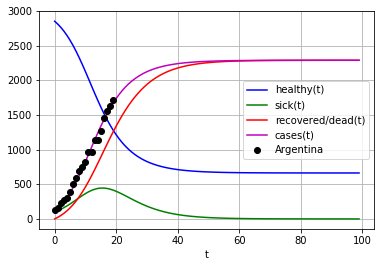

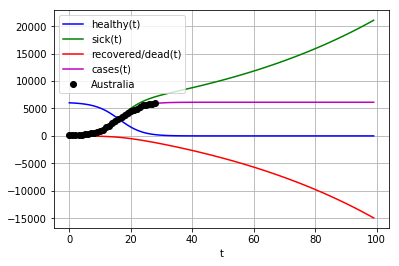

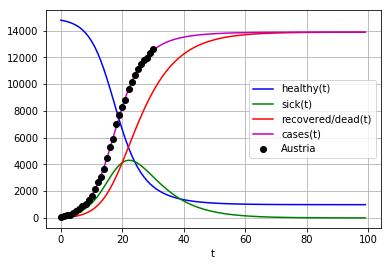

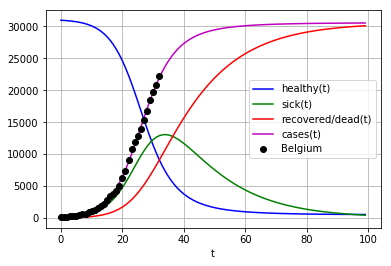

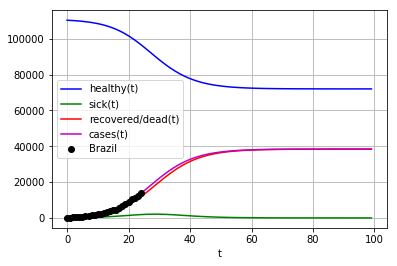

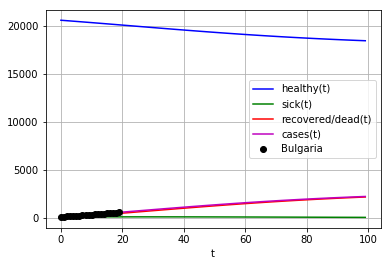

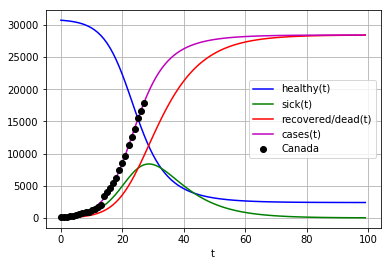

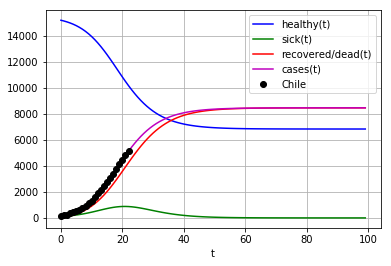

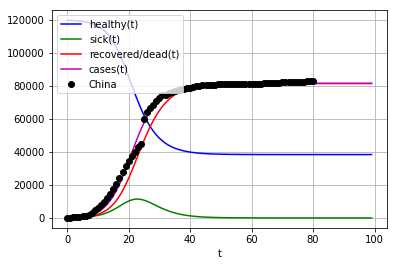

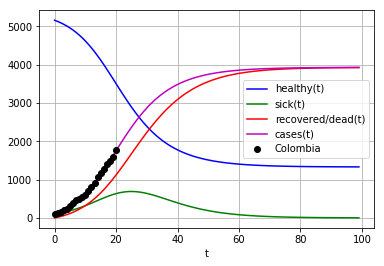

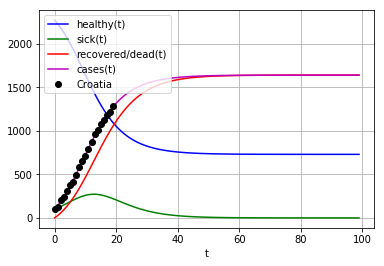

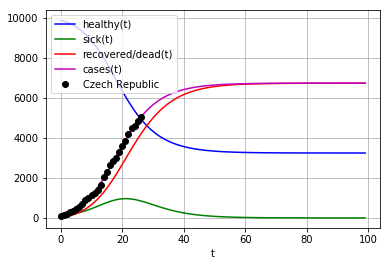

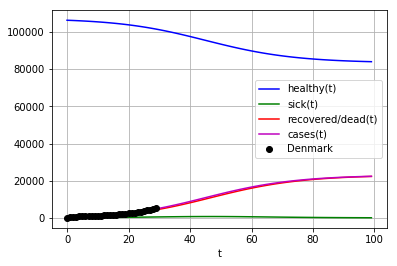

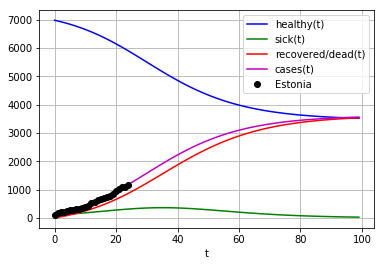

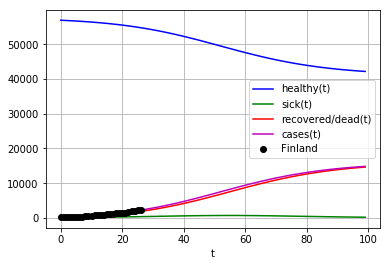

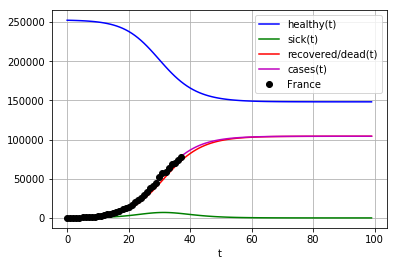

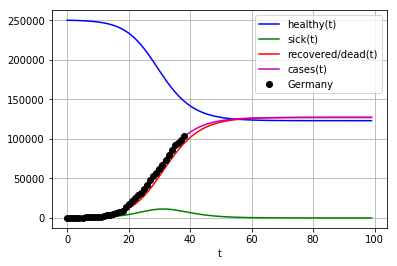

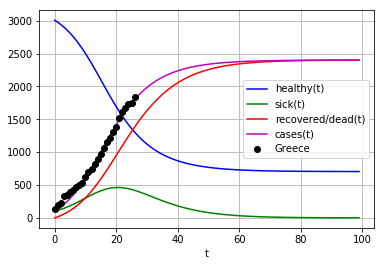

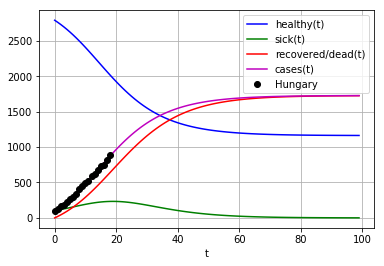

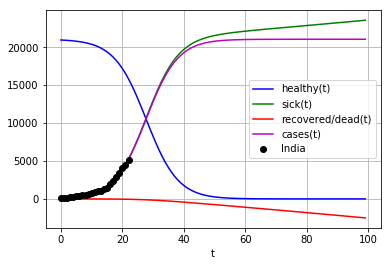

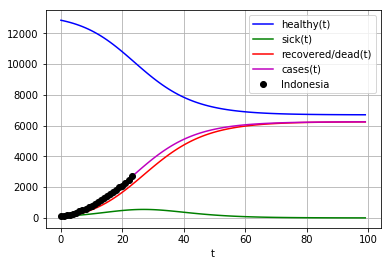

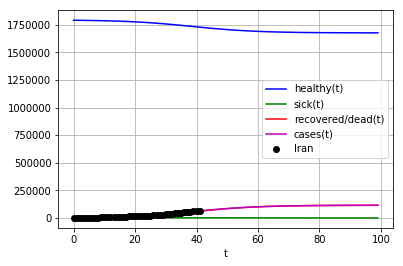

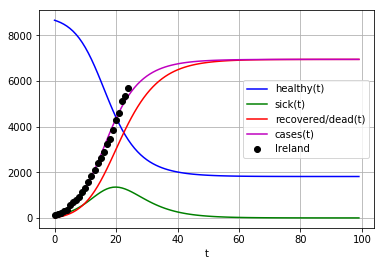

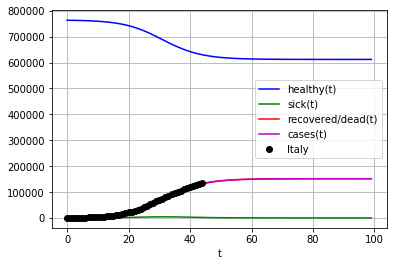

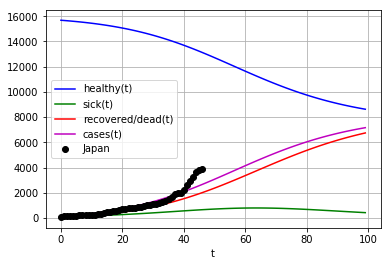

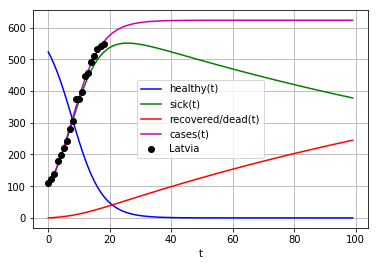

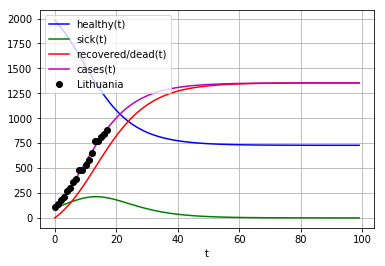

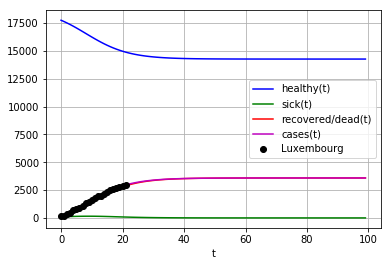

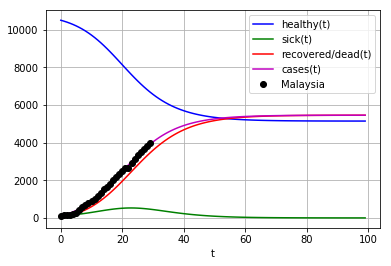

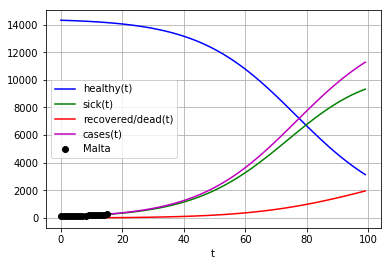

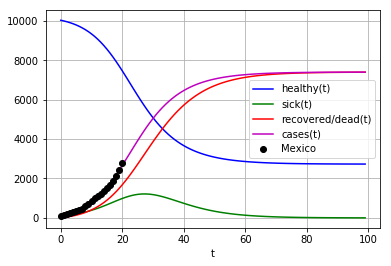

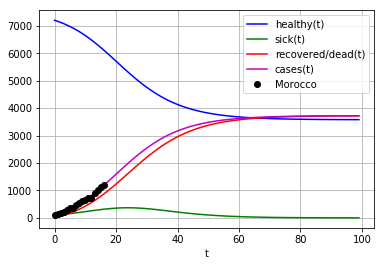

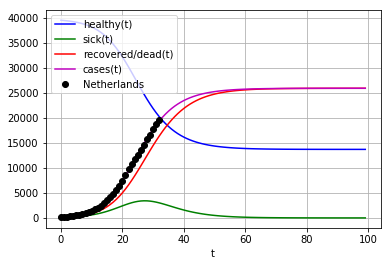

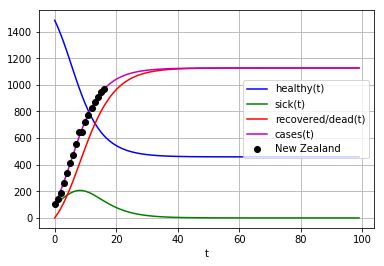

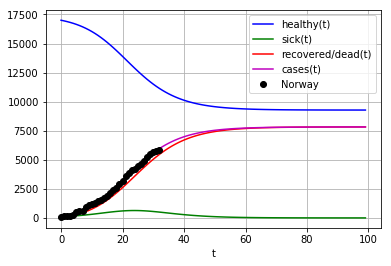

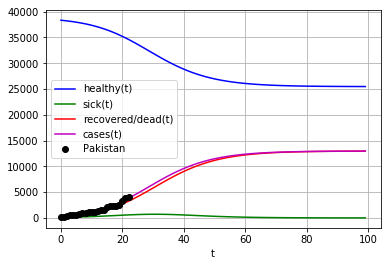

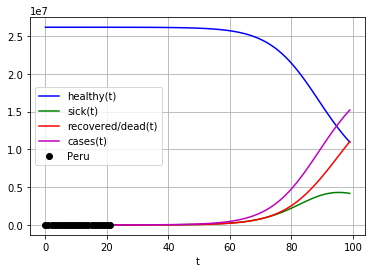

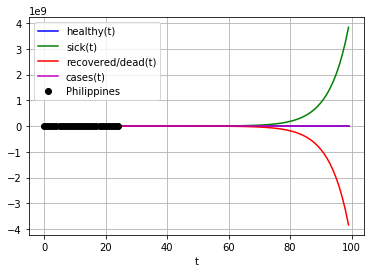

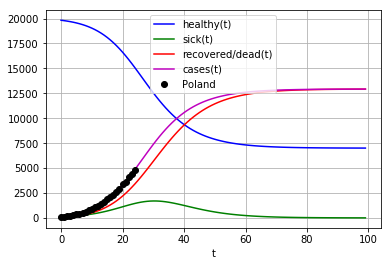

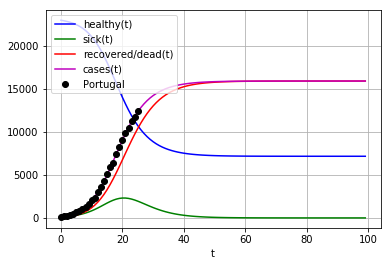

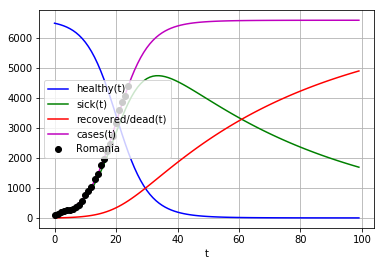

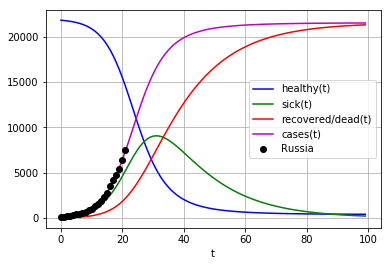

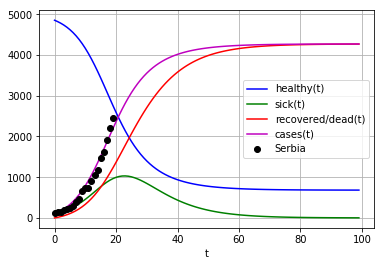

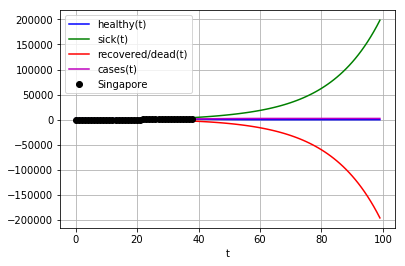

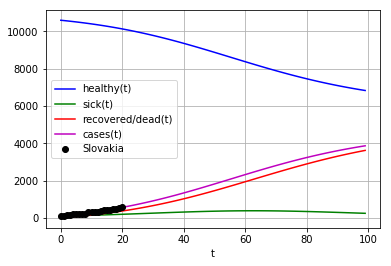

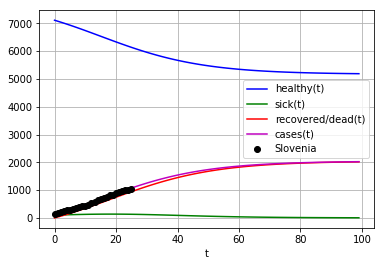

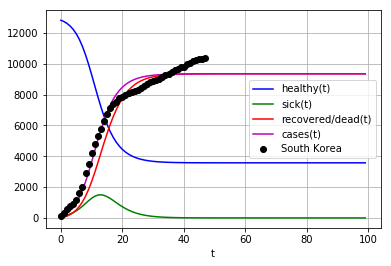

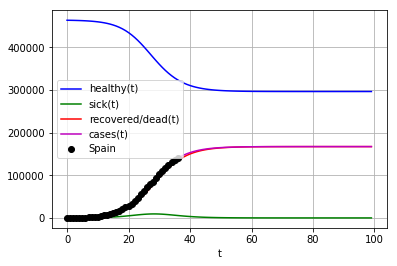

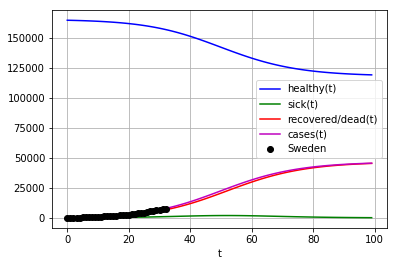

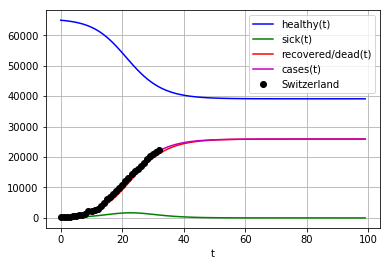

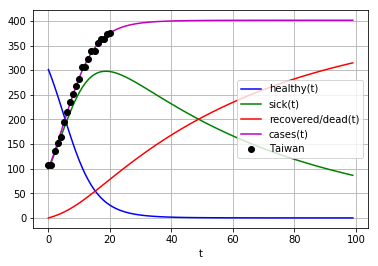

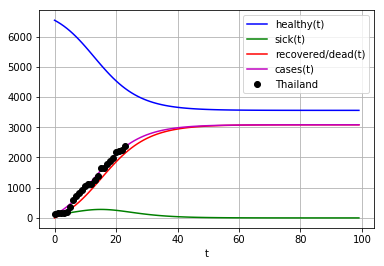

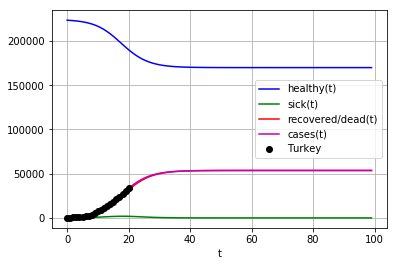

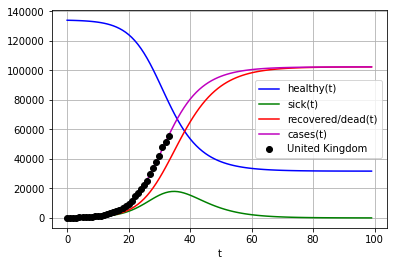

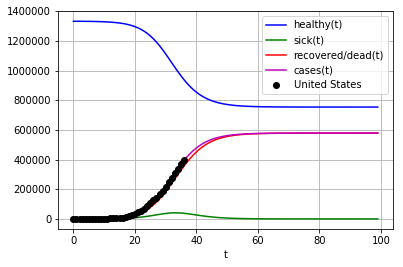

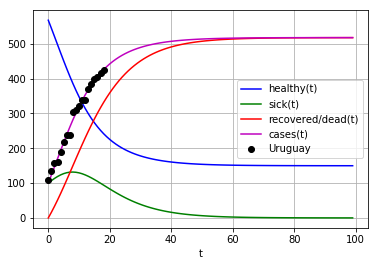

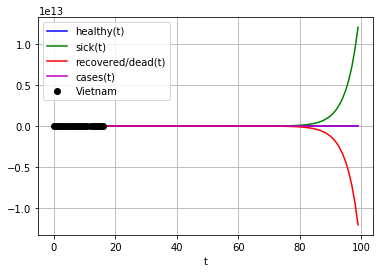

In [37]:
for col in fit_data:
    b = fit_data[col][0]
    n = fit_data[col][2]
    g = fit_data[col][1]
    y0 = [n-100, 100 ,0]
    t = np.linspace(0, 99, 100)
    sol = odeint(SIR, y0, t, args=(b,n,g))
    
    plt.plot(t, sol[:, 0], 'b', label='healthy(t)')
    plt.plot(t, sol[:, 1], 'g', label='sick(t)')
    plt.plot(t, sol[:, 2], 'r', label='recovered/dead(t)')
    plt.plot(t, sol[:,1]+sol[:,2], 'm', label='cases(t)')
    x_cases = cases[col].to_numpy()
    x_cases = [x for x in x_cases if x > 100]
    t = np.linspace(0, len(x_cases)-1, len(x_cases))
    plt.plot(t, x_cases, 'ko', label=col)
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.grid()
    plt.show()

Based on the fits of the data, some countries clearly did not fit the model well at all. This could be due to any number of reasons. I suspect that for many of them a lack of testing meant many cases were not documented.

I was able to adjust the initial inputs for Australia to achieve a reasoanble fit. All other outliers were scrapped.

In [97]:
remove = ['Bulgaria', 'India','Peru','Philippines','Singapore','Vietnam']

for country in remove:
    cases = cases.drop(country, axis=1)
    deaths = deaths.drop(country, axis=1)
    factors = factors.drop(country, axis=1)

In [38]:
# fix
# Australia [0.587,20000,0.441]

# remove
# Bulgaria
# India
# Peru
# Philippines
# Singapore
# Vietnam

# maybe
# Denmark
# Japan
# Iran
# Malta

In [98]:
bs = []
ns = []
gs = []
for col in cases.columns:
    x_cases = cases[col].to_numpy()
    x_cases = [x for x in x_cases if x > 100]
    
    
    P = x_cases

    # Times at which the solution is to be computed.
    t = np.linspace(0, len(x_cases)-1, len(x_cases))


    def coupledODE(beta, x):
        #k, k3, k4 = beta
        b,n,g = beta

        # Three coupled ODEs
        def conc (y, t) : 
            dsdt = -b*y[0]*y[1]/n
            didt = b*y[0]*y[1]/n - g*y[1]
            drdt = g*y[1]
            f = np.array([dsdt, didt, drdt])
            return f


        # Initial conditions for y[0], y[1] and y[2]
        y0 = np.array([n-100, 100, 0.0])

        # Solve the equation
        y = odeint(conc, y0, x)

        return y[:,1]+y[:,2]
        # in case you are only fitting to experimental findings of ODE #1

        # return y.ravel()
        # in case you have experimental findings of all three ODEs

    data = Data(t, P)
    # with P being experimental findings of ODE #1

    # data = Data(np.repeat(t, 3), P.ravel())
    # with P being a (3,N) array of experimental findings of all ODEs

    model = Model(coupledODE)
    if col == 'Australia':
        guess = [0.587,20000,0.441]
    else:
        guess = [0.45,x_cases[-1],0.15]
    odr = ODR(data, model, guess)
    odr.set_job(2)
    out = odr.run()
    bs.append(out.beta[0])
    ns.append(out.beta[1])
    gs.append(out.beta[2])
    
    #print(out.beta)
    #print(out.sd_beta)

#     f = plt.figure()
#     p = f.add_subplot(111)
#     p.plot(t, P, 'ro')
#     p.plot(t, coupledODE(out.beta, t))
#     plt.show()

    

In [99]:
fit_b = pd.DataFrame(bs).transpose()
fit_b.columns = cases.columns
fit_b.index = ['b']
fit_n = pd.DataFrame(ns).transpose()
fit_n.columns = cases.columns
fit_n.index = ['n']
fit_g = pd.DataFrame(gs).transpose()
fit_g.columns = cases.columns
fit_g.index = ['g']

frames = [fit_b, fit_g, fit_n]
fit_data = pd.concat(frames)

In [100]:
fit_data

,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Colombia,Croatia,Czech Republic,Denmark,Estonia,Finland,France,Germany,Greece,Hungary,Indonesia,Iran,Ireland,Italy,Japan,Latvia,Lithuania,Luxembourg,Malaysia,Malta,Mexico,Morocco,Netherlands,New Zealand,Norway,Pakistan,Poland,Portugal,Romania,Russia,Serbia,Slovakia,Slovenia,South Korea,Spain,Sweden,Switzerland,Taiwan,Thailand,Turkey,United Kingdom,United States,Uruguay
b,0.390725,0.558427,0.390226,0.273490,0.829931,0.346410,0.551794,0.692107,0.299799,0.416333,0.444622,0.621096,0.246686,0.396823,0.811893,0.705154,0.301074,0.293272,0.415667,2.836548e+00,0.428603,1.582510,0.185463,0.214761,0.352365,1.172590,0.450842,0.069600,0.336478,0.369264,0.487678,0.507875,0.526416,0.587304,0.378420,0.562046,0.219977,0.283522,0.312185,0.166654,0.335972,0.762394,1.095365,0.564174,0.864202,0.211514,0.548819,1.893775,0.421238,9.545780e-01,0.266152
g,0.207632,0.384482,0.134753,0.065258,0.676706,0.125111,0.381994,0.413469,0.165197,0.253929,0.269490,0.553356,0.179789,0.339938,0.629877,0.505204,0.160463,0.200218,0.308039,2.746944e+00,0.217419,1.420638,0.132453,0.005542,0.228809,1.077410,0.325203,0.006215,0.188875,0.269155,0.301153,0.307166,0.397584,0.484470,0.235766,0.332592,0.017567,0.069037,0.137181,0.128410,0.298248,0.431696,0.883535,0.480770,0.679605,0.016806,0.418500,1.658934,0.223169,7.278887e-01,0.154974
n,2953.444165,13482.064567,14869.899911,31069.135442,110379.590901,30828.354623,15294.131487,119770.084518,5261.691427,2370.123260,9967.724209,106389.163742,7081.608632,57007.103292,252386.759332,250272.124155,3105.877475,2890.112974,12940.468762,1.791236e+06,8765.003252,763276.338575,15784.988461,623.174928,2082.935439,17848.236557,10593.753942,14412.983057,10125.960006,7301.061969,39681.789137,1585.167274,17100.301362,38428.489394,19931.774572,23114.791670,6598.556267,21902.326867,4955.532722,10695.126463,7210.941656,12915.685344,463405.962876,164873.577339,65038.883894,401.361317,6638.347436,223597.933360,134124.553107,1.332100e+06,667.723525


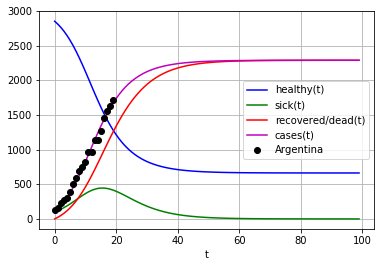

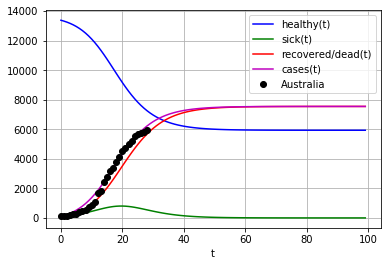

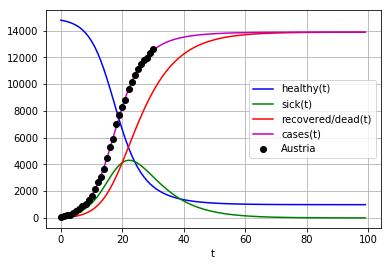

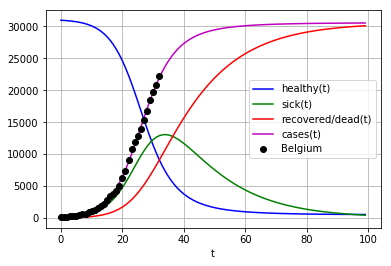

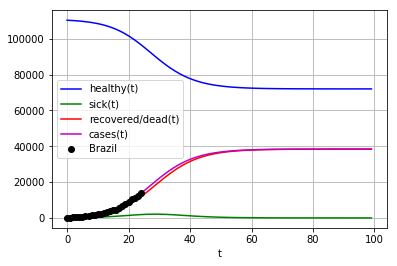

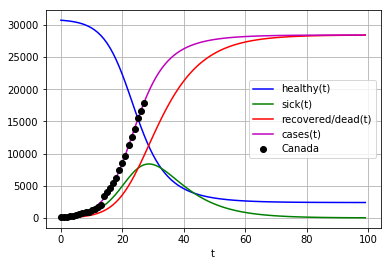

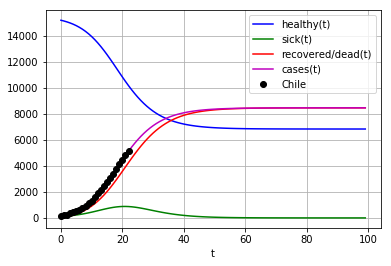

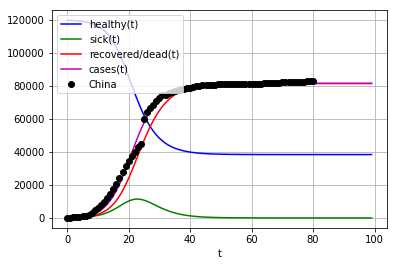

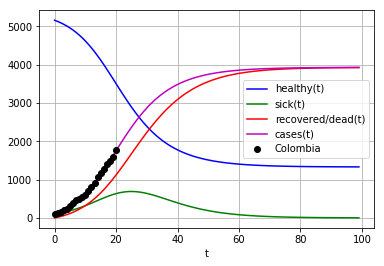

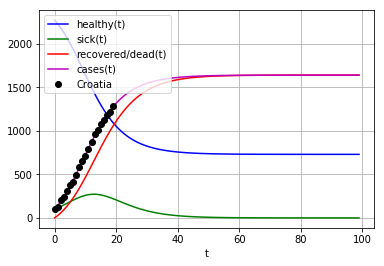

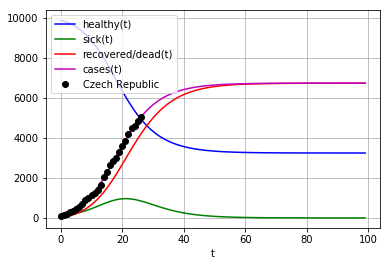

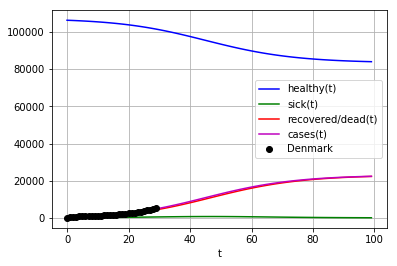

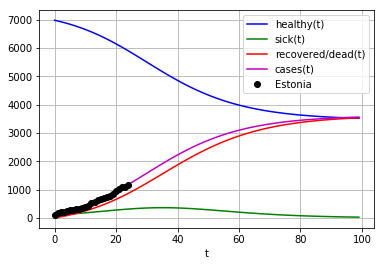

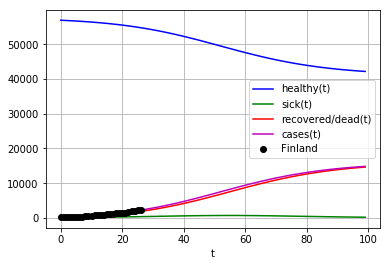

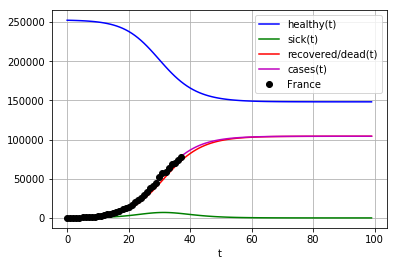

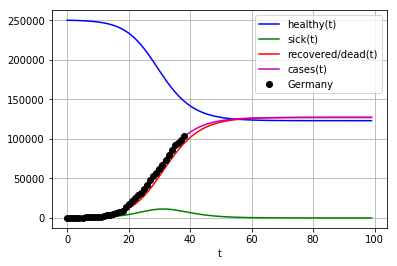

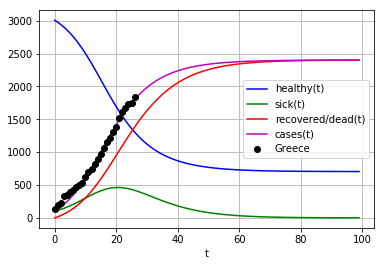

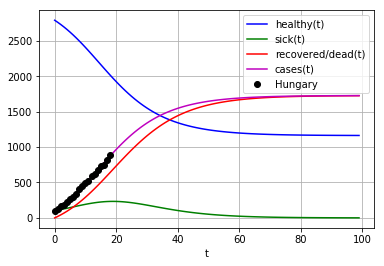

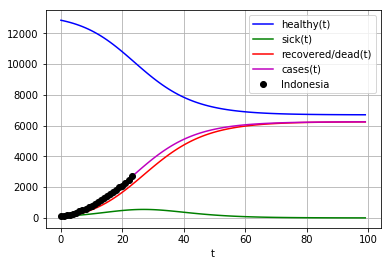

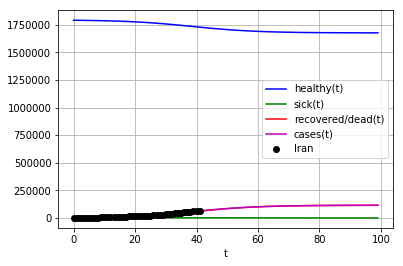

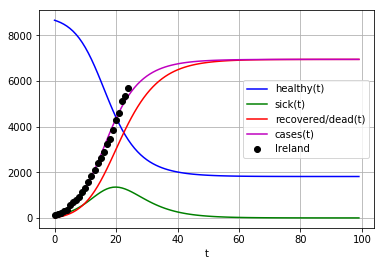

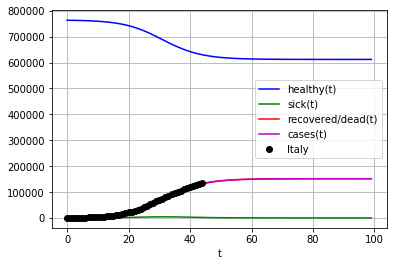

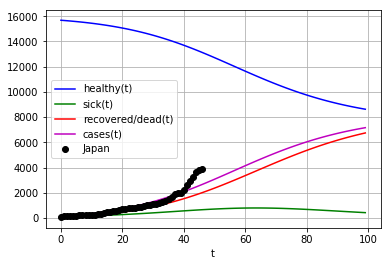

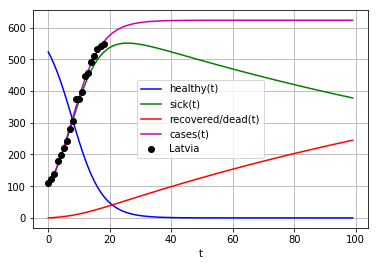

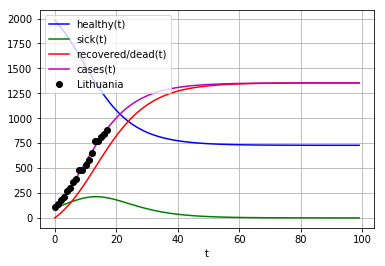

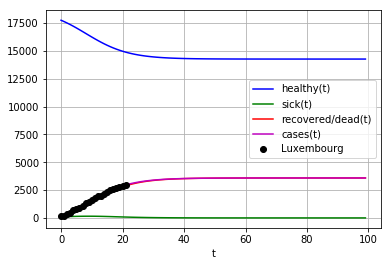

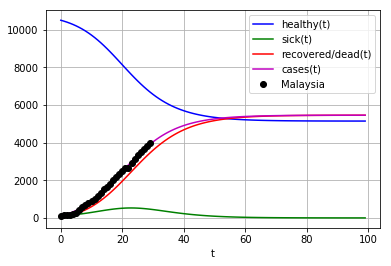

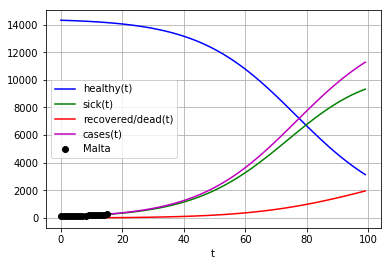

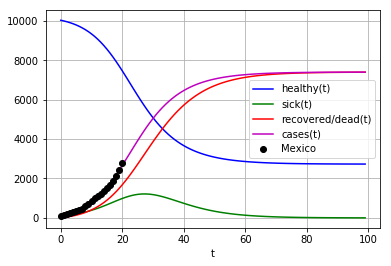

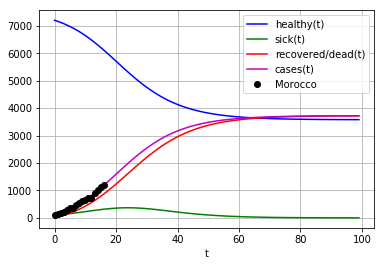

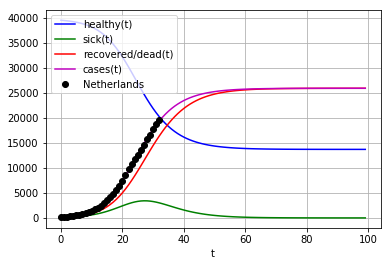

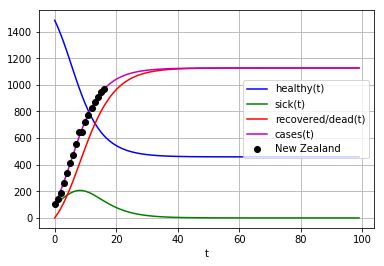

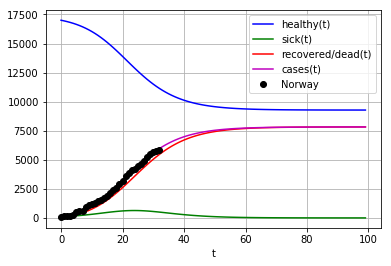

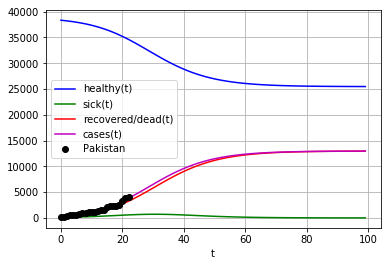

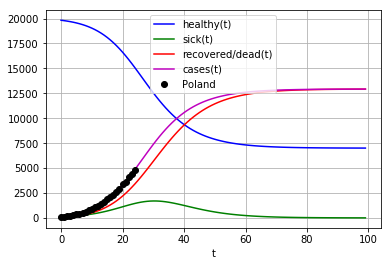

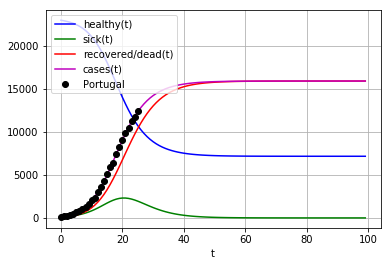

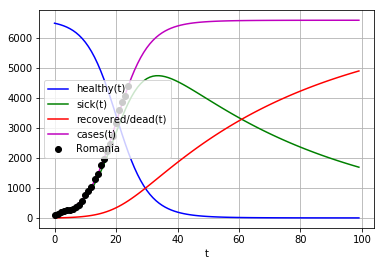

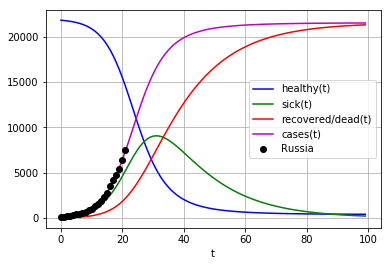

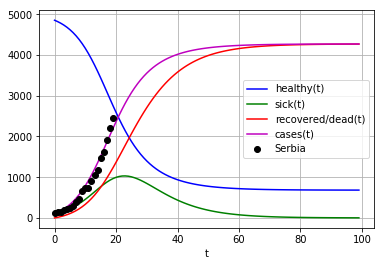

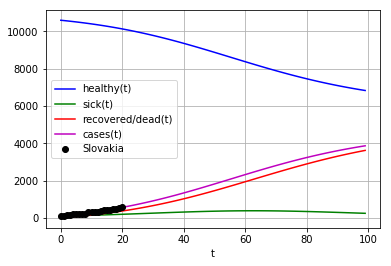

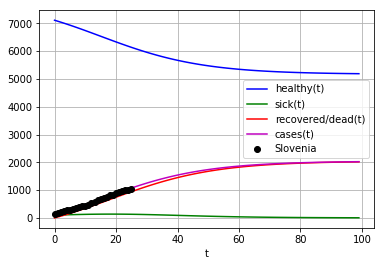

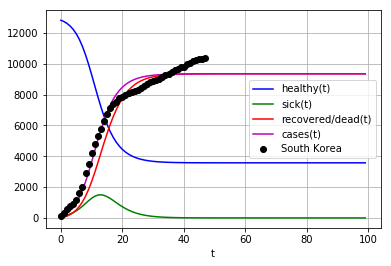

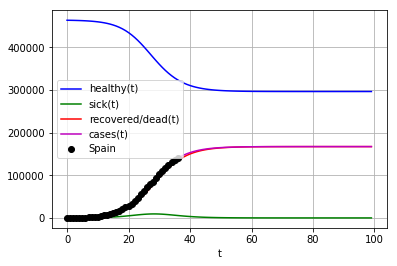

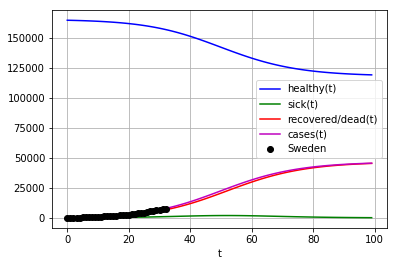

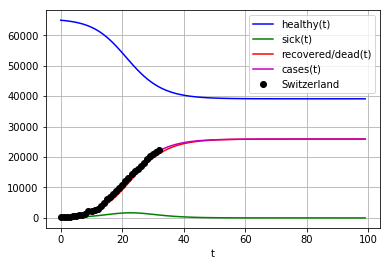

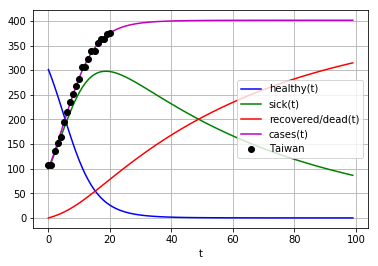

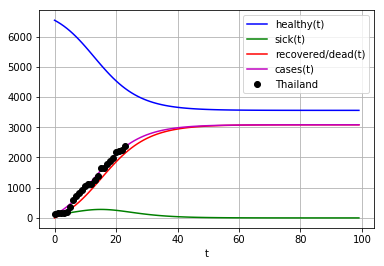

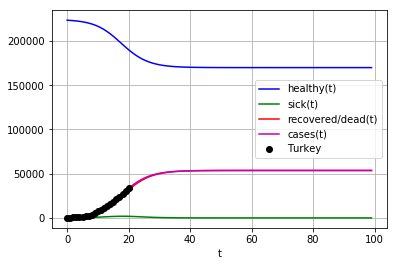

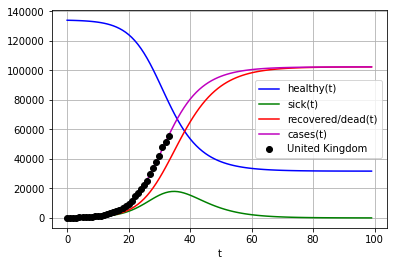

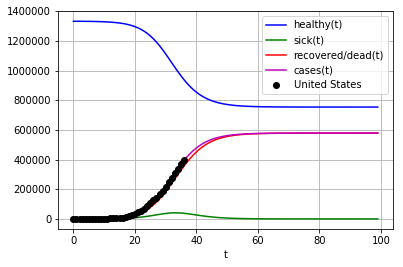

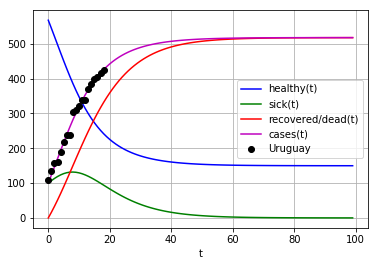

In [101]:
for col in fit_data:
    b = fit_data[col][0]
    n = fit_data[col][2]
    g = fit_data[col][1]
    y0 = [n-100, 100 ,0]
    t = np.linspace(0, 99, 100)
    sol = odeint(SIR, y0, t, args=(b,n,g))
    
    plt.plot(t, sol[:, 0], 'b', label='healthy(t)')
    plt.plot(t, sol[:, 1], 'g', label='sick(t)')
    plt.plot(t, sol[:, 2], 'r', label='recovered/dead(t)')
    plt.plot(t, sol[:,1]+sol[:,2], 'm', label='cases(t)')
    x_cases = cases[col].to_numpy()
    x_cases = [x for x in x_cases if x > 100]
    t = np.linspace(0, len(x_cases)-1, len(x_cases))
    plt.plot(t, x_cases, 'ko', label=col)
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.grid()
    plt.show()

In [102]:
fit_data.to_csv('fit_data.csv')